In [6]:
# mengimport libary
import numpy as np
import scipy.stats as stats # libary untuk melakukan analisis statistik
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [3]:
# menentukan rataan 2 kelompok
# grup 1 = tanpa pupuk
# grup 2 = dengan pupuk

rataan1 = 50 # tinggi tanaman 50 cm
rataan2 = 65 # tinggi tanaman 65 cm

# menentukan standar deviasi (variasi) -- sama untuk 2 kelompok
sd = 5

# ukuran sempel 2 kelompok
sample1 = 50 # 50 tanaman
sample2 = 40 # 40 tanaman

In [8]:
# generate(menghasilkan) bilangan random
test = np.random.randn(sample1) # isi/nilai nya ngacak
test

array([ 0.563485  ,  0.48430003,  1.81818148,  0.29050085, -1.04542468,
       -1.35099101,  0.41868163, -0.51474101, -0.19911334,  0.40417351,
       -1.14292277,  0.24235203,  1.10950149,  0.6754489 , -2.07536494,
        1.09891065,  1.08938107,  0.94646773, -1.57791132,  2.59727773,
       -0.09364842,  1.04704999,  0.29261157,  1.24443122,  0.41288464,
        0.71483669, -1.64758349,  1.86385686,  0.10396004, -0.49097928,
       -0.54005859,  0.53360075,  0.60173176, -1.57870342, -1.53554602,
       -0.70080018,  0.34602021,  0.69569141, -0.14692174,  0.13768086,
        1.68721302,  0.834788  , -0.27713171,  0.49212293, -0.62665311,
        0.15449063,  0.49192057, -2.10185033,  1.34641356,  1.29040292])

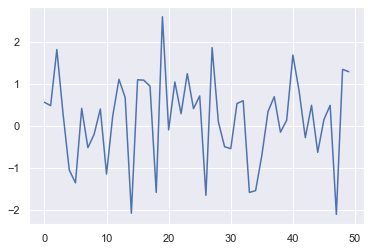

In [10]:
plt.plot(test)

c:\users\jarvis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

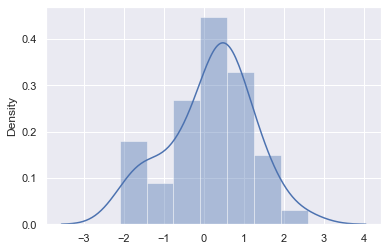

In [18]:
sns.distplot(test); # ; titikkoma untuk menghilangkan keterangannya

In [12]:
# generate(menghasilkan) data
data1 = np.random.randn(sample1)*sd+rataan1 # nanti yang ngacak sd nya bukan sample1. jadi rataan + sd yang ngacak akan menghasilkan data acak
data2 = np.random.randn(sample2)*sd+rataan2

# menggabungkan sample size (jumlah data)
kelompok_data = [sample1 , sample2] # ini untuk plotting di bagian akhir

batas = [np.min(np.hstack((data1,data2))),np.max(np.hstack((data1,data2)))] # hstack untuk data array ratakan secara rata kanan

In [13]:
# kita ingin melihat data terkecil dan terbesar
batas

[42.137762072174894, 79.99065043529475]

c:\users\jarvis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\jarvis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


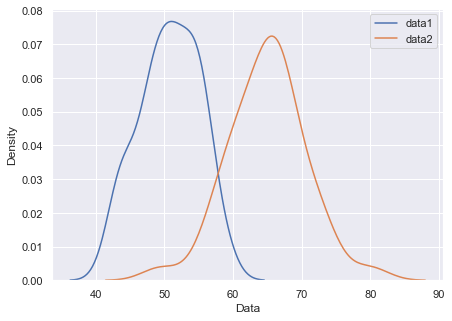

In [20]:
# plot distribusi kedua kelompok (Statistik deskriptif)
# ini untuk visial
plt.figure(figsize=(7,5)) # untuk ukuran gambarnya, 7 panjangnya, 5 lebarnya

a = sns.distplot(data1, hist = False, label = 'data1') # hist itu batangnya jadi yangtampil cuma kurfa saja
a = sns.distplot(data2, hist = False, label = 'data2')

a.set(xlabel='Data', ylabel='Density')
plt.legend(); # legend untuk mengaktifkan label data1&data2. # ; titikkoma untuk menghilangkan keterangannya

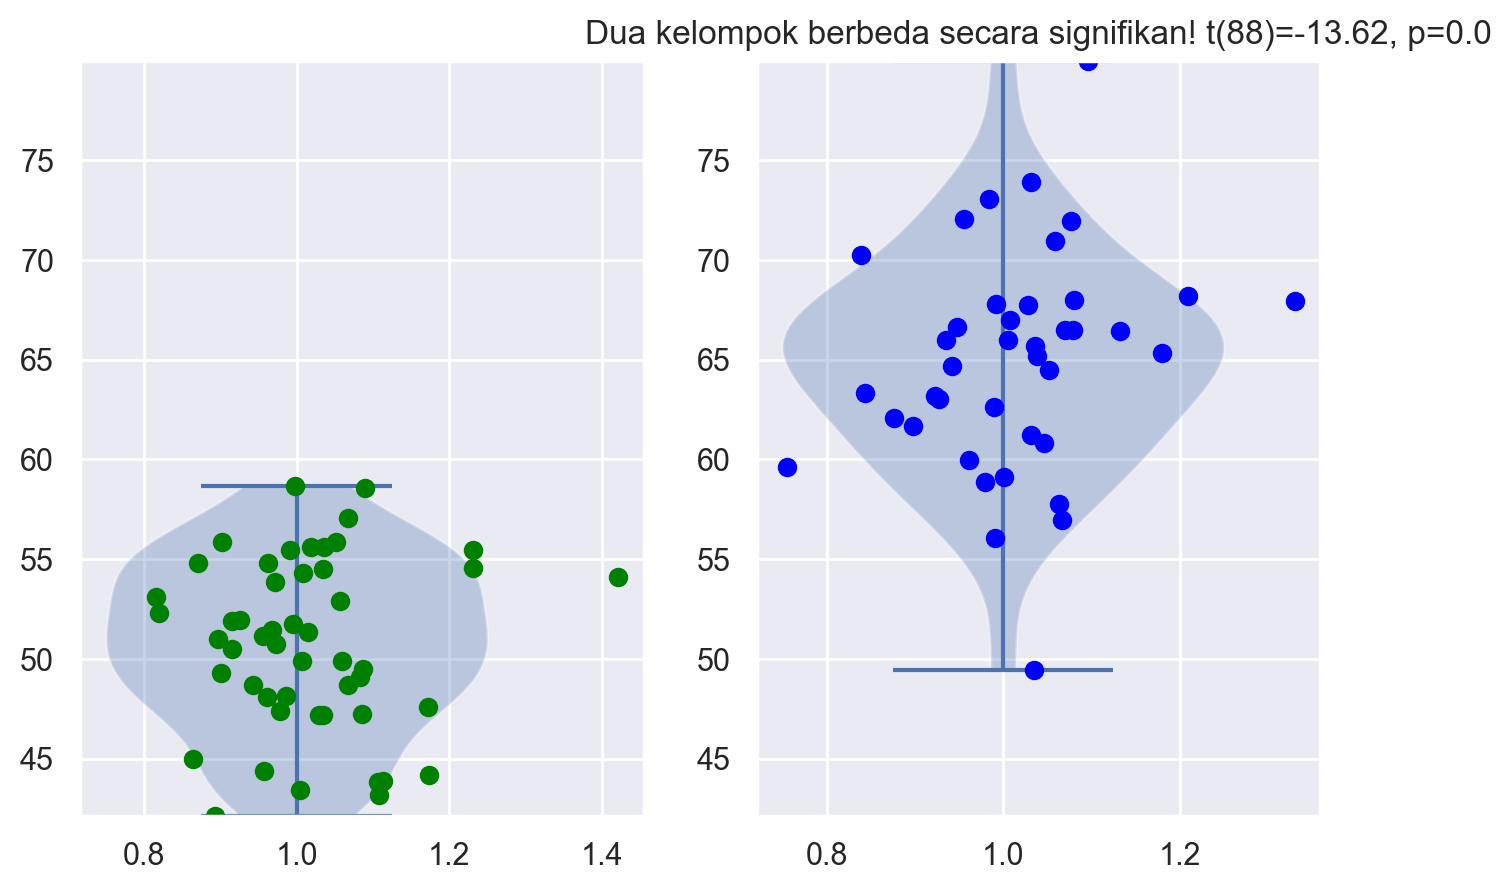

In [23]:
# melakukan uji statiskit (statistik inferensial)
# pake matplotlib objek orientid
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi=200)  # 1 baris 2kolom, ukuran=8 panjangnya 5lebarnya, dpi=200 agar jelas

ax[0].violinplot(data1) # untuk mengplot density
ax[0].plot(1+np.random.randn(sample1)/10, data1, 'o', color='green') # mengplot titik titiknya
ax[0].set_ylim(batas) # sumbu y nya akan mentok dibatas nya

ax[1].violinplot(data2) # untuk mengplot density
ax[1].plot(1+np.random.randn(sample2)/10, data2, 'o', color='blue') # mengplot titik titiknya
ax[1].set_ylim(batas) # sumbu y nya akan mentok dibatas nya

# melakukan uji t-test
t,p = stats.ttest_ind(data1,data2) #t-test artinya hasil dari data1 tidak terkait dengan data2 atau sebaliknya

# mencetak hasil t test dijudul
sigtxt = ('',' TIDAK')
plt.title('Dua kelompok{} berbeda secara signifikan! t({})={}, p={}'.format(sigtxt[int(p>0.5)],
                                                                            sum(kelompok_data)-2,
                                                                           np.round(t,2),
                                                                           np.round(p,6)))
plt.show()